In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras import models, layers

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
size_of_image = 256
size_of_batch = 32
no_of_channels = 3
no_of_epochs = 50
no_of_classes = 3

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/PotatoLeavesDataset",
    shuffle = True,
    image_size = (size_of_image, size_of_image),
    batch_size = size_of_batch
)

Found 2155 files belonging to 3 classes.


In [ ]:
name_of_classes = dataset.class_names

In [ ]:
name_of_classes

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

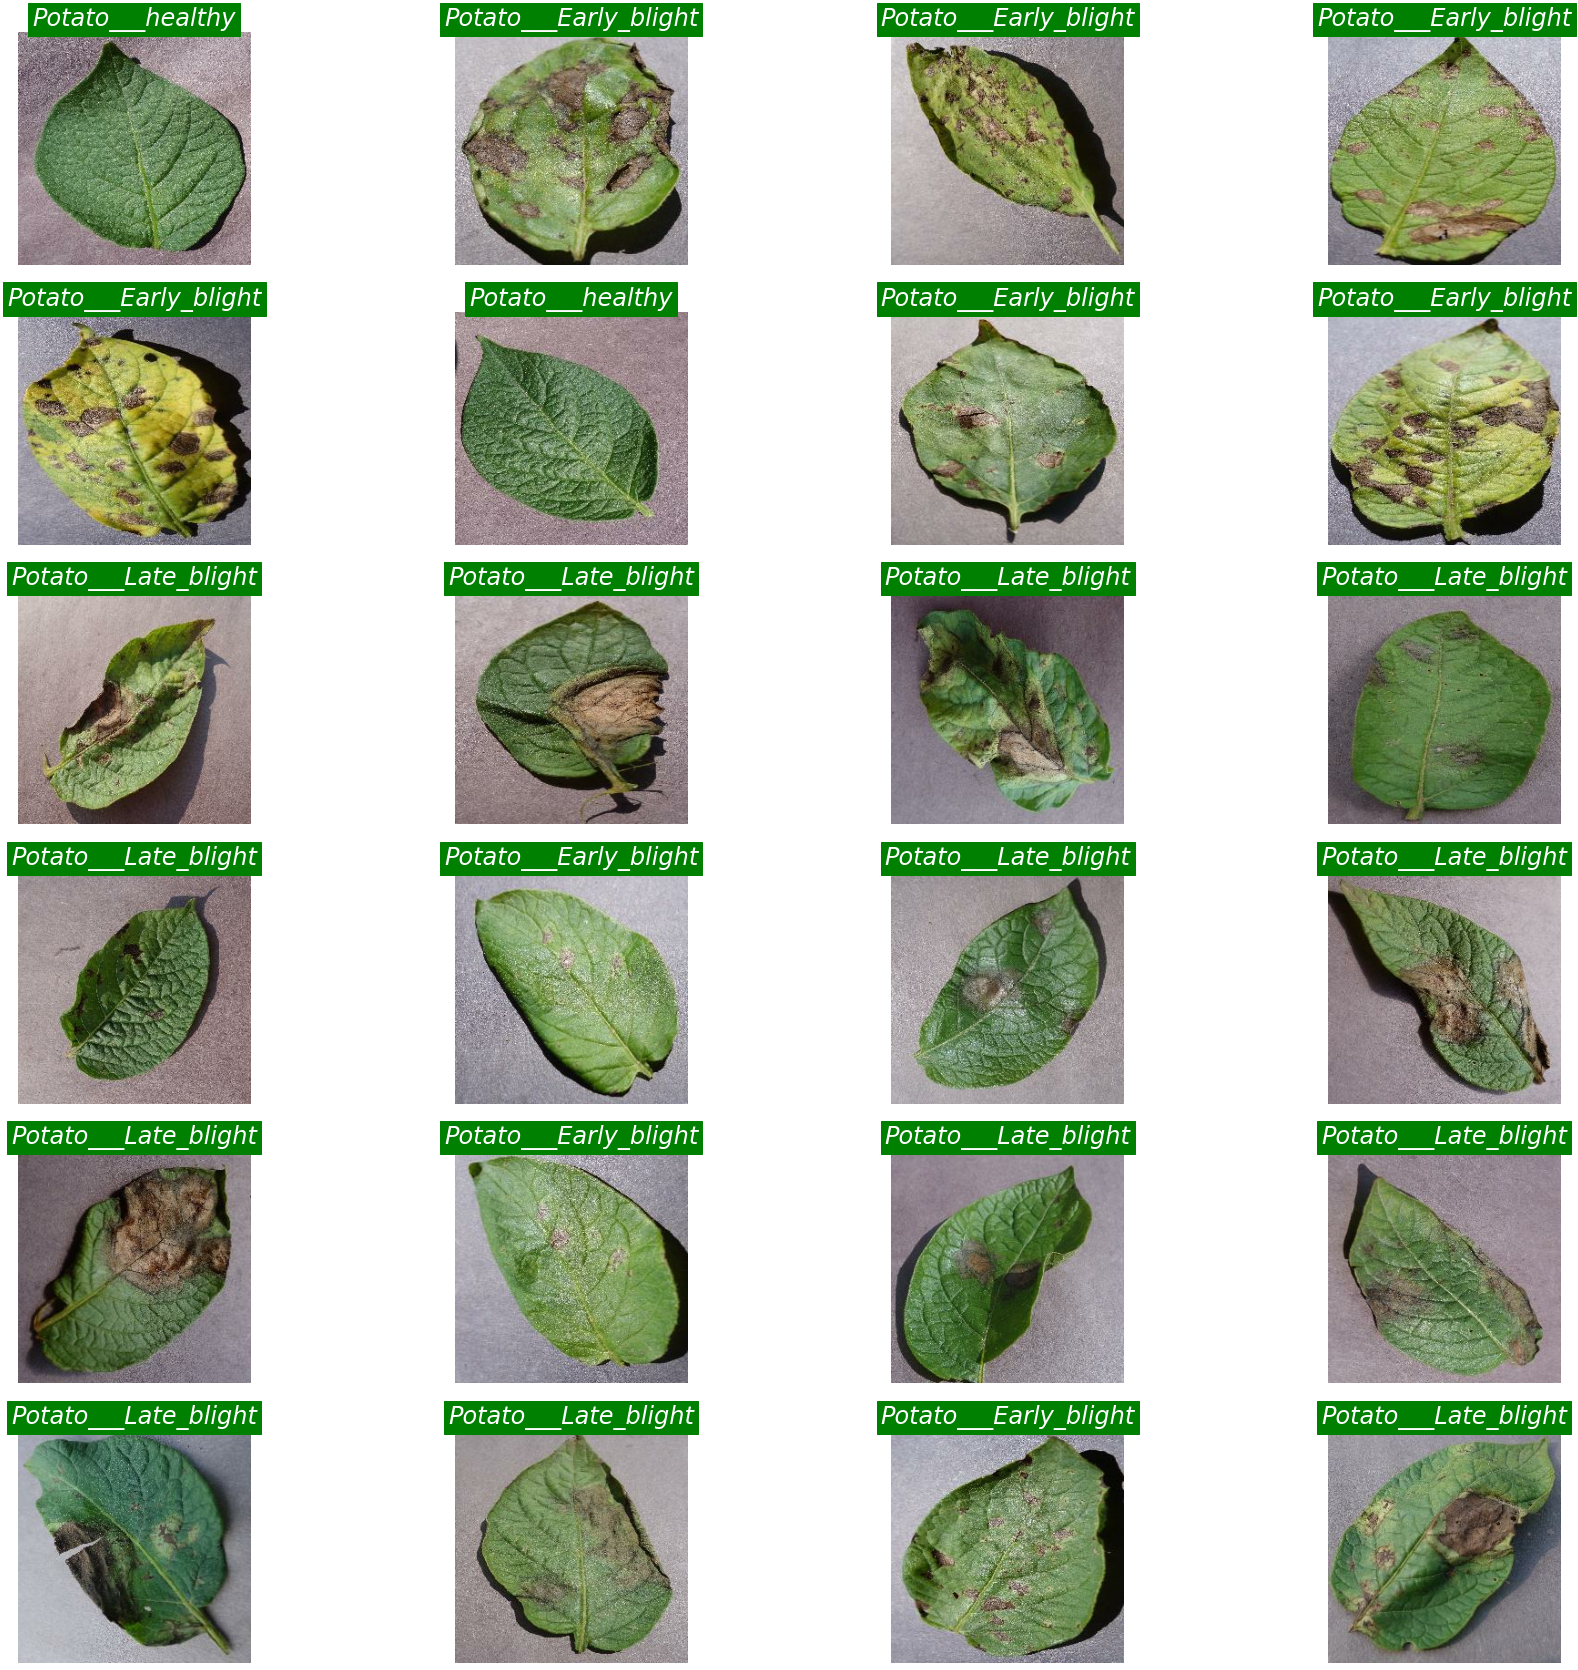

In [ ]:
plt.figure(figsize=(30,30))
for images_of_batch, labels_of_batch in dataset.take(1):
  for i in range(24):
    ax = plt.subplot(6, 4, i+1)
    plt.title(name_of_classes[labels_of_batch[i]],
            fontsize=24,
            color="white", 
            backgroundcolor="green",
            fontstyle="italic"
            )
    plt.imshow(images_of_batch[i].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
training_dataset = dataset.take(int((len(dataset) * 0.8)))

In [ ]:
len(training_dataset)

54

In [ ]:
remaining_dataset = dataset.skip(int((len(dataset) * 0.8)))

In [ ]:
len(remaining_dataset)

14

In [ ]:
validation_dataset = remaining_dataset.take(int(len(dataset) * 0.1))

In [ ]:
len(validation_dataset)

6

In [ ]:
testing_dataset = remaining_dataset.skip(int(len(dataset) * 0.1))

In [ ]:
len(testing_dataset)

8

In [ ]:
training_dataset = training_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
validation_dataset = validation_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
testing_dataset = testing_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resizing_and_rescaling = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(size_of_image,size_of_image),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
augmented_data = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
input_shape = (size_of_batch, size_of_image, size_of_image, no_of_channels)
model = models.Sequential([
    resizing_and_rescaling,
    augmented_data,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(no_of_classes, activation = 'softmax'),
])

In [ ]:
model.build(input_shape=input_shape)

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
fitting_history = model.fit(
    training_dataset,
    epochs = no_of_epochs,
    batch_size = size_of_batch,
    verbose = 1,
    validation_data = validation_dataset
)

Epoch 1/50
54/54 [==============================] - 420s 6s/step - loss: 0.8999 - accuracy: 0.4954 - val_loss: 0.8483 - val_accuracy: 0.5260
Epoch 2/50
54/54 [==============================] - 290s 5s/step - loss: 0.7184 - accuracy: 0.6892 - val_loss: 0.6316 - val_accuracy: 0.7604
Epoch 3/50
54/54 [==============================] - 289s 5s/step - loss: 0.5302 - accuracy: 0.7992 - val_loss: 0.4384 - val_accuracy: 0.8490
Epoch 4/50
54/54 [==============================] - 298s 6s/step - loss: 0.4083 - accuracy: 0.8380 - val_loss: 0.3248 - val_accuracy: 0.8802
Epoch 5/50
54/54 [==============================] - 290s 5s/step - loss: 0.3511 - accuracy: 0.8588 - val_loss: 0.2597 - val_accuracy: 0.8646
Epoch 6/50
54/54 [==============================] - 287s 5s/step - loss: 0.2849 - accuracy: 0.8895 - val_loss: 0.2422 - val_accuracy: 0.9219
Epoch 7/50
54/54 [==============================] - 289s 5s/step - loss: 0.2555 - accuracy: 0.9028 - val_loss: 0.3022 - val_accuracy: 0.8750
Epoch 8/50
54

In [ ]:
fitting_history

In [ ]:
scores = model.evaluate(testing_dataset)

8/8 [==============================] - 15s 1s/step - loss: 0.0577 - accuracy: 0.9787


In [ ]:
fitting_history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [ ]:
fitting_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = fitting_history.history['accuracy']
val_acc=fitting_history.history['val_accuracy']
loss = fitting_history.history['loss']
val_loss = fitting_history.history['val_loss']

Text(0.5, 1.0, 'Training And Validation Accuracy')

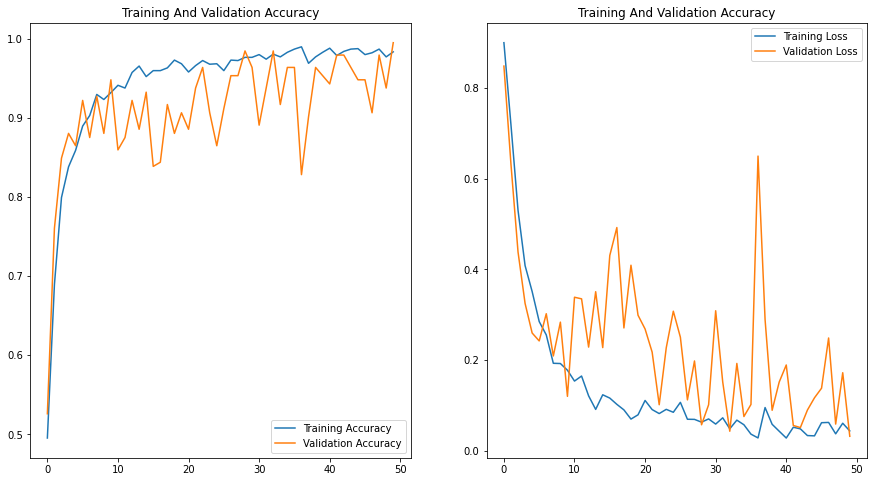

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
plt.plot(range(no_of_epochs), acc, label='Training Accuracy')
plt.plot(range(no_of_epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training And Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(no_of_epochs), loss, label='Training Loss')
plt.plot(range(no_of_epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training And Validation Accuracy')

In [ ]:
tested_dataset = model.predict(testing_dataset)

8/8 [==============================] - 10s 1s/step


In [ ]:
np.argmax(tested_dataset[17])

2

In [ ]:
for img_batch, lbl_batch in testing_dataset.take(1):
  img = img_batch[17].numpy().astype('uint8')
  img_lbl = lbl_batch[17].numpy()
  print(name_of_classes[img_lbl])

Potato___Early_blight


In [ ]:
def predict(model, img):
  image_array = tf.keras.preprocessing